In [3]:
import numpy as np
from sklearn import metrics, inspection, datasets
from matplotlib import pyplot as plt

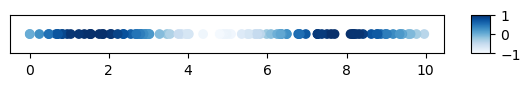

In [4]:
x = np.random.uniform(0, 10, size=(100,))
y = np.sin(x) + np.random.rand(100) * 0.1

fig, ax = plt.subplots(figsize=(7, 0.5))
scatter = ax.scatter(x, np.zeros_like(x), c=y, cmap="Blues", vmin=-1, vmax=1)
ax.set_yticks([])
fig.colorbar(scatter, ax=ax, aspect=2)
plt.show()

In [5]:
# create an array of zeros with same shape as x
preds_y0 = np.full(x.shape, 0)

In [6]:
def loss(y_true, y_pred):
    return (y_true - y_pred) ** 2

mse_loss = loss(y, preds_y0)

In [7]:
def grad_loss(y_true, y_pred):
    return 2 * (y_true - y_pred)

# The derivative is just 2 for all x values
# so we create an array of 2s with same shape as x
def grad_grad_loss(y_true, y_pred):
    return np.full(y_pred.shape, 2)

In [8]:
# XGBoost defaults for regularization params
lambd = 1
gamma = 0

# this computes the score, as introduced in the reading. Skim this.
def leaf_score(leaf_true_ys, leaf_pred_ys):
    numerator = np.sum(grad_loss(leaf_true_ys, leaf_pred_ys)**2)
    denominator = np.sum(grad_grad_loss(leaf_true_ys, leaf_pred_ys)**2)
    return numerator / (denominator + lambd)
 

# You only need to use this function directly to solve this question:
def gain(x, y, preds, threshold):
    # The threshold should be a real valued number
    left_mask = x <= threshold
    right_mask = x >= threshold

    left_child = leaf_score(y[left_mask], preds[left_mask])
    right_child = leaf_score(y[right_mask], preds[right_mask])
    parent = leaf_score(y, preds)
    gain = 0.5 * (left_child + right_child - parent) - gamma
    return gain

# Find the threshold value that leads to the first split with the highest gain

In [10]:
#Will use a set to remove any duplicate values
possible_thresholds = set(np.sort(x))  # Use sorted x values as potential thresholds
max_gain = float("-inf")
best_threshold = None

# Try each possible threshold and find the one with highest gain
for threshold in possible_thresholds:
    current_gain = gain(x, y, preds_y0, threshold)
    if current_gain > max_gain:
        max_gain = current_gain
        best_threshold = threshold

print(f"Best threshold: {best_threshold}")
print(f"Maximum gain: {max_gain}")

Best threshold: 2.0631103559410358
Maximum gain: 0.3204285614460127


# 2nd Level Thresholds

In [11]:
# Now split the data into left and right halves based on the first split
left_mask = x <= best_threshold
right_mask = x > best_threshold

# Get the data for each half
x_left = x[left_mask]
y_left = y[left_mask]
preds_left = preds_y0[left_mask]

x_right = x[right_mask]
y_right = y[right_mask]
preds_right = preds_y0[right_mask]

In [12]:
# Find the best split for the left half
left_thresholds = set(np.sort(x_left))
left_max_gain = float("-inf")
left_best_threshold = None

for threshold in left_thresholds:
    current_gain = gain(x_left, y_left, preds_left, threshold)
    if current_gain > left_max_gain:
        left_max_gain = current_gain
        left_best_threshold = threshold

print(f"Best left branch threshold: {left_best_threshold}")
print(f"Maximum left branch gain: {left_max_gain}")

Best left branch threshold: 1.7568114486374709
Maximum left branch gain: 0.4588755374314299


In [13]:
# Find the best split for the right half
right_thresholds = set(np.sort(x_right))
right_max_gain = float("-inf")
right_best_threshold = None

for threshold in right_thresholds:
    current_gain = gain(x_right, y_right, preds_right, threshold)
    if current_gain > right_max_gain:
        right_max_gain = current_gain
        right_best_threshold = threshold

print(f"Best right branch threshold: {right_best_threshold}")
print(f"Maximum right branch gain: {right_max_gain}")

Best right branch threshold: 2.223618977029125
Maximum right branch gain: 0.28857184706165956
